In [1]:
%config Completer.use_jedi = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
pd.set_option('display.max_rows', 100)

from matplotlib.patches import Rectangle

In [2]:
def word_to_vector(word):

     vec = [0]*len('abcdefghijklmnopqrstuvwxyz1234567890')
     for num, x in enumerate('abcdefghijklmnopqrstuvwxyz1234567890'):
         val = word.lower()
         val = val.count(x)
         vec[num] = val 
     return np.array(vec)

In [3]:
marker = pd.read_excel('lumpsum.xls')
wells = glob.glob('ARD/*')

In [4]:
len(marker),len(wells)

(611, 431)

In [5]:
asd=marker.Well.unique()
len(asd)

306

In [6]:
dsa=marker.Well
len(dsa)

611

In [7]:
well_marker = marker.Well.unique()
wells_data = [well.replace('ARD\\','').replace('.csv', '') for well in wells]
# menghilangkan tulisan CSV

In [8]:
penggabungan = {}
for w1 in well_marker:
    container = []
    for w2 in wells_data:
        w1v   = word_to_vector(w1)
        w2v   = word_to_vector(w2)
        diff = sum(np.abs(w1v - w2v)) 
        container.append(diff)
    loc = np.argmin(container)
    loc = wells_data[loc]
    penggabungan[w1] = loc+'.csv'
#     menggabungkan nama well yang ada di marker

In [9]:
marker['well_data'] = [penggabungan[well] for well in marker.Well.values]
# membuat column baru dengan well data yang sudah di pairs

In [10]:
for val,num  in enumerate(marker.columns):
    print(val,num)

0 Well
1 ZoneName
2 Long
3 Lat
4 Type
5 Units
6 Top
7 Bottom
8 Gross
9 Net
10 N/G
11 AvPhi
12 AvSw
13 AvVcl
14 AvGMAX
15 AvGMIN
16 AvNWCL
17 AvRWCL
18 AvRw
19 AvTemp
20 Phi*H
21 PhiSo*H
22 Dryclay
23 Salinity
24 who
25 well_data


In [11]:
marker

,Well,ZoneName,Long,Lat,Type,Units,Top,Bottom,Gross,Net,...,AvNWCL,AvRWCL,AvRw,AvTemp,Phi*H,PhiSo*H,Dryclay,Salinity,who,well_data
0,7 C FARMS #1,Heebner,-98.21577,38.596616,MD,ft,2607.00,2722.32,115.32,115.32,...,0.334,2.566,0.063,98.129,7.36,0.09,3.351351,95282.773870,gurning,7 C Farms 1.csv
1,A Goering #1,Heebner,-97.540324,38.335513,MD,ft,2081.14,2326.00,244.86,244.86,...,0.342,2.560,0.069,68.658,23.36,0.12,3.370821,122766.784100,gurning,A. Goering 1.csv
2,Alan No.C-1,Heebner,-98.376504,38.164348,MD,ft,2914.00,3086.52,172.52,172.52,...,0.334,2.581,0.134,102.931,5.27,0.06,3.373874,38425.040080,gurning,Alan C-1.csv
3,Amstutz #1-8,Heebner,-98.344236,38.407085,MD,ft,2748.00,2901.00,153.00,153.00,...,0.294,2.601,0.102,100.416,8.28,0.71,3.267705,53759.209990,gurning,Amstutz 1-8.csv
4,Ankerholz A No.1,Heebner,-98.399422,38.412072,MD,ft,2794.00,2937.00,143.00,143.00,...,0.320,2.585,0.132,101.002,4.67,0.26,3.330882,39836.001140,gurning,Ankerholz 'A' 1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,Wonderful World 1,Kansas City,-96.839489,37.232229,MD,m,758.86,865.02,106.16,106.16,...,0.290,2607.000,0.067,67551.000,1.97,0.03,3272.930000,3.263380,arum,Wonderful Word 1.csv
607,Young Cox Unit 1-27,Kansas City,-97.847675,37.667499,MD,m,985.08,1078.68,93.60,93.60,...,0.101,2660.000,0.111,69596.000,2.50,0.41,1448.400000,2.845556,arum,Young Cox Unit 1-27.csv
608,Zimmerman 1-34,Kansas City,-97.407765,37.141473,MD,m,1095.10,1179.76,84.66,84.66,...,0.314,2597.000,0.045,90777.000,1.64,0.26,3677.890000,3.327988,arum,German 1.csv
609,ZINK 2-4,Kansas City,-98.52814,37.815520,MD,m,1015.40,1092.13,76.73,76.73,...,0.308,2603.000,0.096,89984.000,4.57,0.02,1673.610000,3.309798,arum,Kaw 2.csv


In [12]:
Heebner=marker[marker['ZoneName']=="Heebner"]

Lansing=marker[marker['ZoneName']=='Lansing']
KansasCity=marker[marker['ZoneName']=='Kansas City']
Howard=marker[marker['ZoneName']=='Howard']

In [13]:
len(Heebner), len(Lansing), len(KansasCity), len(Howard)

(176, 130, 129, 176)

# Heebner

c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in tr

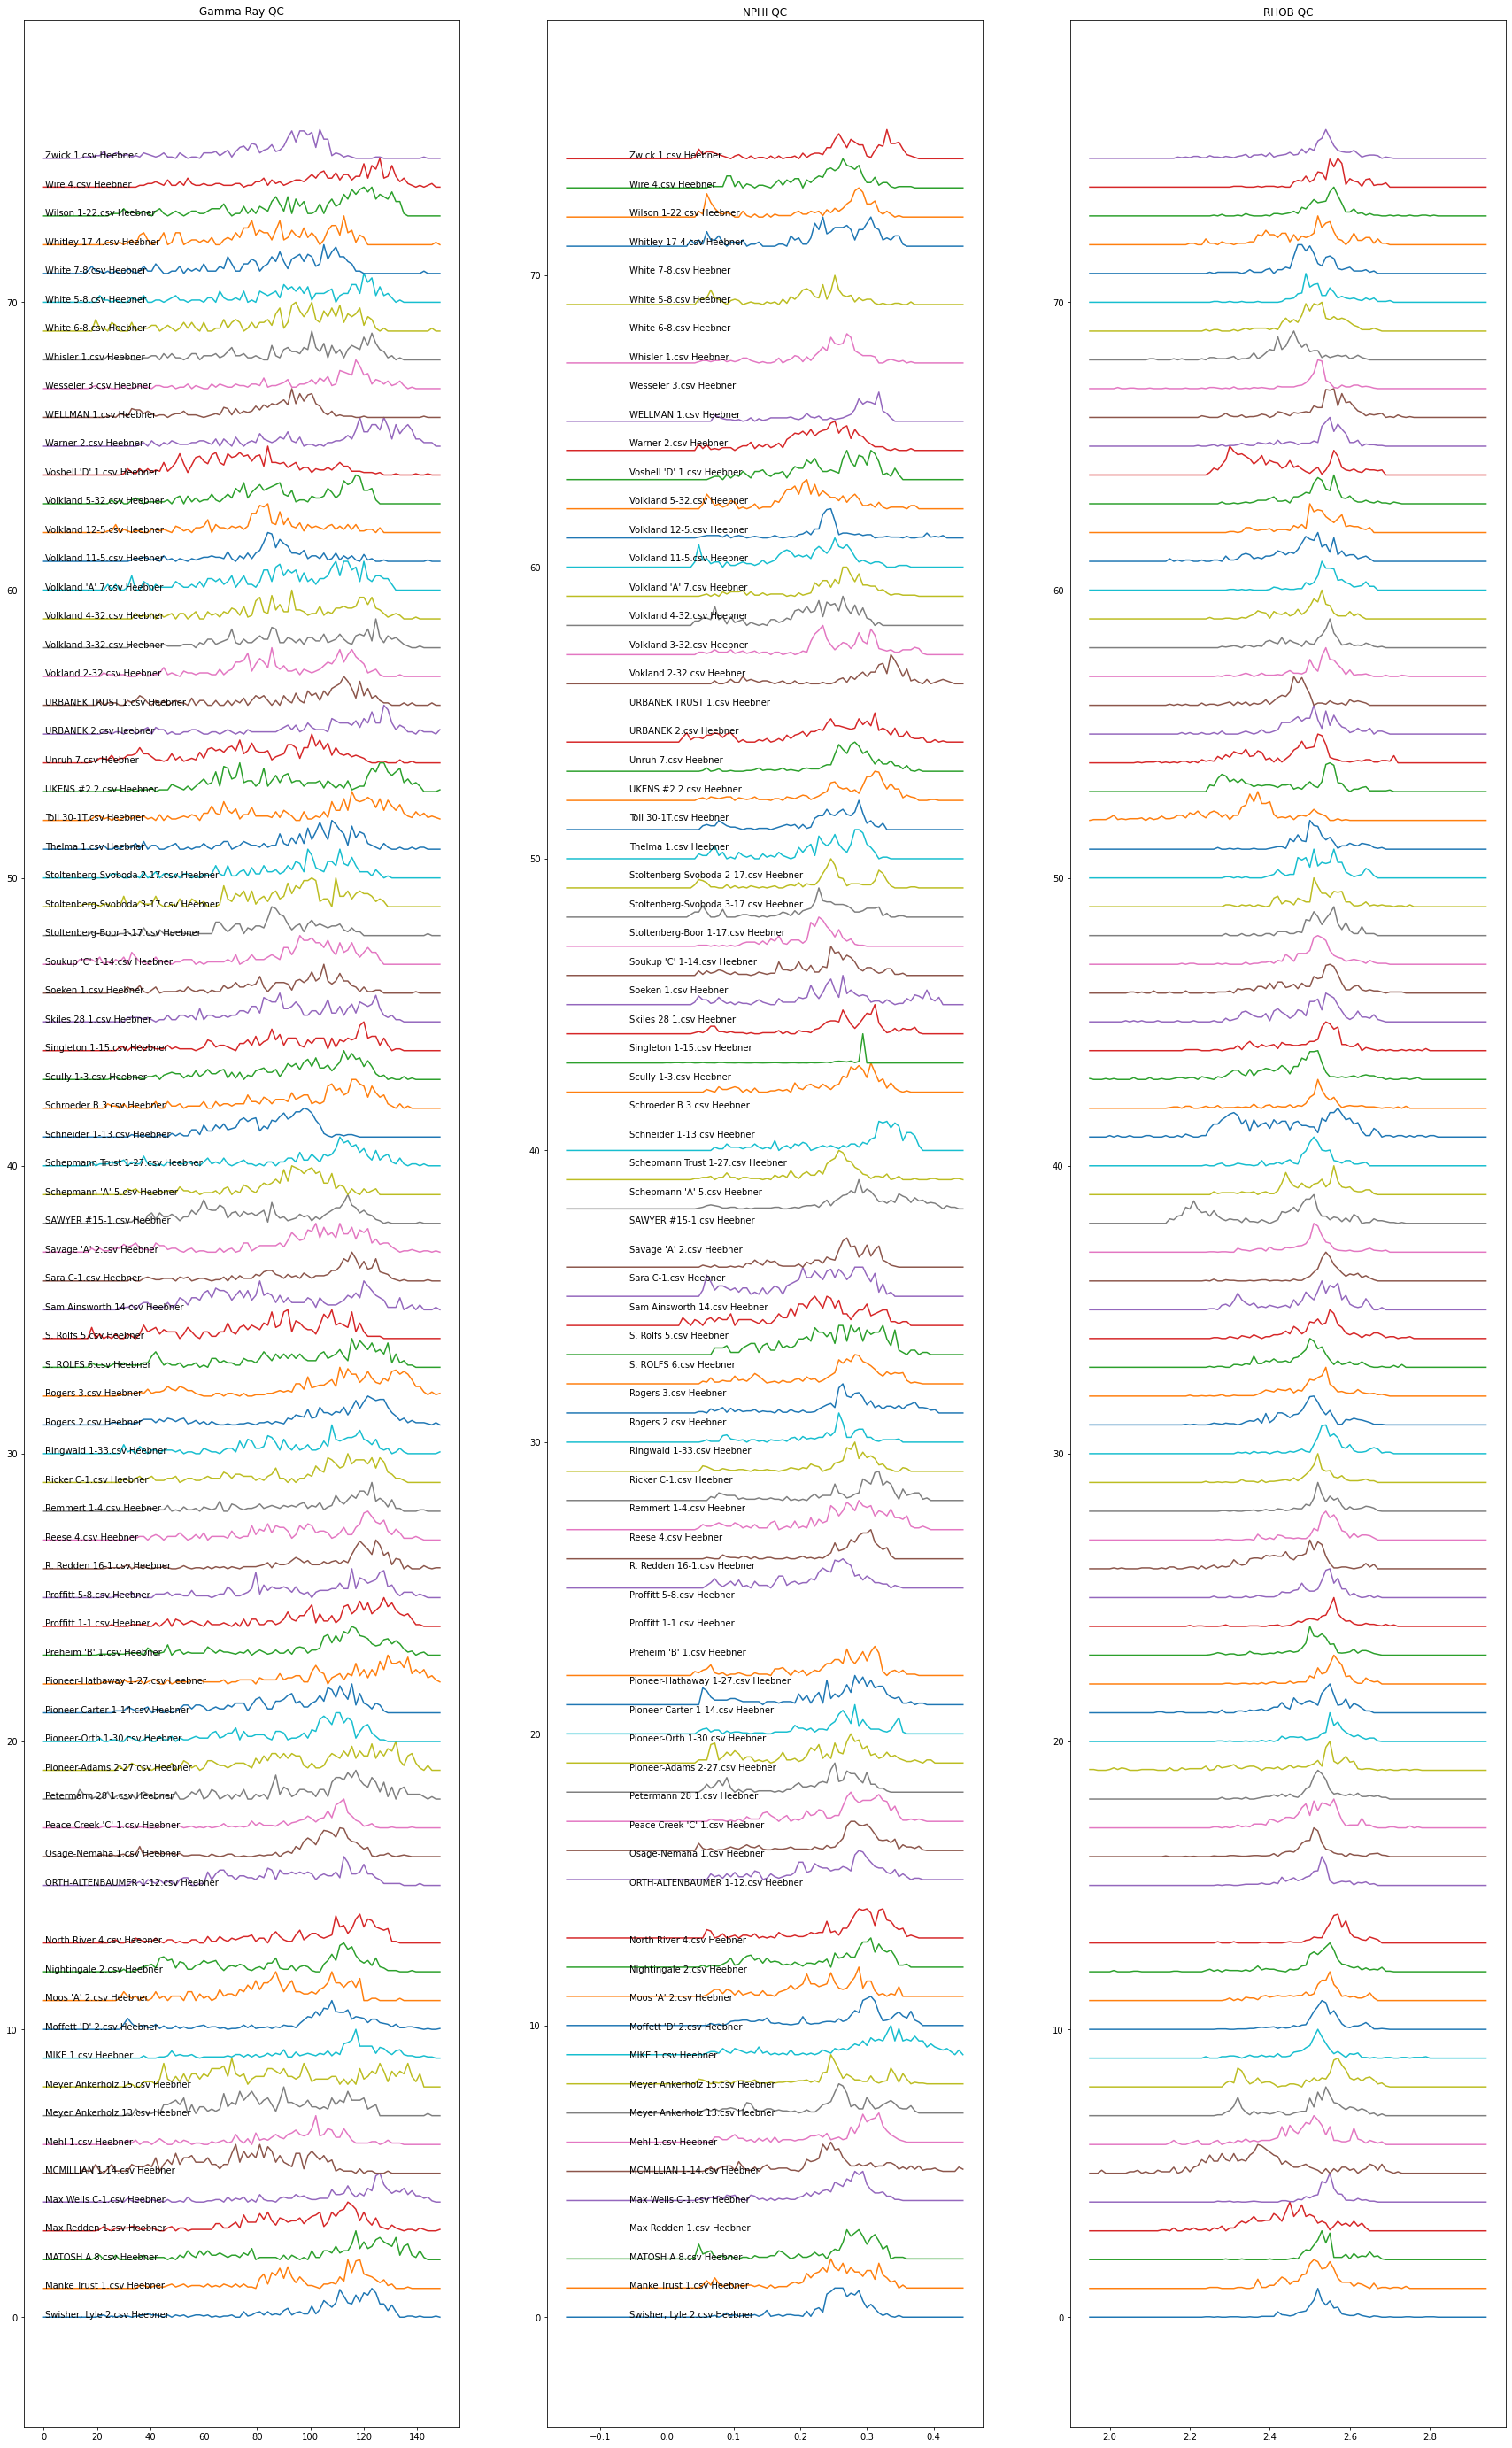

In [14]:
plt.figure(figsize=(30,50))
plt.title("Heebner")
for num, val in enumerate(Heebner.values[100:len(Heebner)]):
    try:
        well_name = val[25]
        zone = val[1]
        top = val[6]
        bot = val[7]
        well_data = pd.read_csv('calculated/'+well_name)
        well_data = well_data[(well_data['DEPT'] > top) & (well_data['DEPT'] < bot)]

        # GR
        plt.subplot(1,3,1)
        plt.title("Gamma Ray QC")
        GR = well_data['GR'].values
        gamma_data = np.histogram(GR.flatten(), bins=100, range=(0,150),density=True)
        freq_gamma = gamma_data[0] / max(gamma_data[0])
        bins_gamma = gamma_data[1]
        plt.plot(bins_gamma[:-1], freq_gamma + num)
        plt.text(0.7, num, well_name+' '+zone)
        
        # NPHI 
        plt.subplot(1,3,2)
        plt.title("NPHI QC")
        nphi = well_data['NPHI'].values
        hist_data = np.histogram(nphi.flatten(), bins=100, range=(-0.15,0.45),density=True)
        freq = hist_data[0] / max(hist_data[0])
        bins = hist_data[1]
        plt.plot(bins[:-1], freq + num)
        plt.text(0.7, num, well_name+' '+zone)
        
        #RHOB
        
        plt.subplot(1,3,3)
        plt.title("RHOB QC")
        RHOB = well_data['RHOB'].values
        RHOB_data = np.histogram(RHOB.flatten(), bins=100, range=(1.95,2.95),density=True)
        freq_RHOB = RHOB_data[0] / max(RHOB_data[0])
        bins_RHOB = RHOB_data[1]
        plt.text(0.8, num, well_name+' '+zone)
        plt.plot(bins_RHOB[:-1], freq_RHOB + num)
        
        
        
        
        
       



        
    except:
        pass

# Lansing

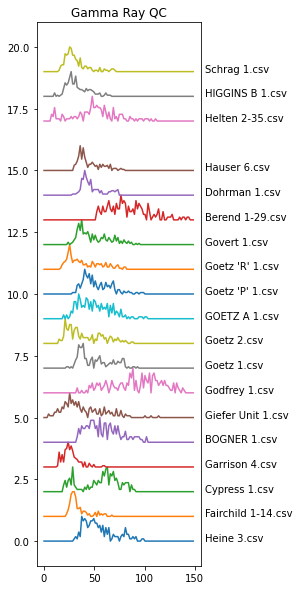

In [15]:
plt.figure(figsize=(10,10))

for num, val in enumerate(Lansing.values[30:50]):
    try:
        well_name = val[25]
        zone = val[1]
        top = val[6]
        bot = val[7]
        well_data = pd.read_csv('calculated/'+well_name)
        well_data = well_data[(well_data['DEPT'] > top) & (well_data['DEPT'] < bot)]

        # GR
        plt.subplot(1,3,1)
        plt.title("Gamma Ray QC")
        GR = well_data['GR'].values
        gamma_data = np.histogram(GR.flatten(), bins=100, range=(0,150),density=True)
        freq_gamma = gamma_data[0] / max(gamma_data[0])
        bins_gamma = gamma_data[1]
        plt.plot(bins_gamma[:-1], freq_gamma + num)
        plt.text(160, num, well_name)
        
        # # NPHI 
        # plt.subplot(1,3,2)
        # plt.title("NPHI QC")
        # nphi = well_data['NPHI'].values
        # hist_data = np.histogram(nphi.flatten(), bins=100, range=(-0.15,0.45),density=True)
        # freq = hist_data[0] / max(hist_data[0])
        # bins = hist_data[1]
        # plt.plot(bins[:-1], freq + num)
        # plt.text(0.7, num, well_name+' '+zone)
        
        # #RHOB
        
        # plt.subplot(1,3,3)
        # plt.title("RHOB QC")
        # RHOB = well_data['RHOB'].values
        # RHOB_data = np.histogram(RHOB.flatten(), bins=100, range=(1.95,2.95),density=True)
        # freq_RHOB = RHOB_data[0] / max(RHOB_data[0])
        # bins_RHOB = RHOB_data[1]
        # plt.text(0.7, num, well_name+' '+zone)
        # plt.plot(bins_RHOB[:-1], freq_RHOB + num)
        
        
        
        
        
       



        
    except:
        pass

# KansasCity

c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


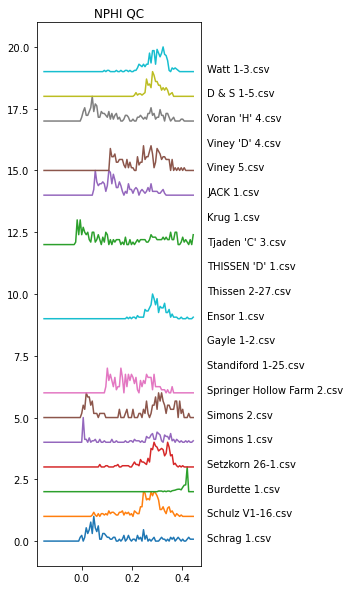

In [16]:
plt.figure(figsize=(10,10))

for num, val in enumerate(KansasCity.values[100:120]):
    try:
        well_name = val[25]
        zone = val[1]
        top = val[6]
        bot = val[7]
        well_data = pd.read_csv('calculated/'+well_name)
        well_data = well_data[(well_data['DEPT'] > top) & (well_data['DEPT'] < bot)]

        # # GR
        # plt.subplot(1,3,1)
        # plt.title("Gamma Ray QC")
        # GR = well_data['GR'].values
        # gamma_data = np.histogram(GR.flatten(), bins=100, range=(0,150),density=True)
        # freq_gamma = gamma_data[0] / max(gamma_data[0])
        # bins_gamma = gamma_data[1]
        # plt.plot(bins_gamma[:-1], freq_gamma + num)
        # plt.text(160, num, well_name)
        
        # # RT 
        # plt.subplot(1,3,2)
        # plt.title("RT QC")
        # RT = well_data['RT'].values
        # hist_data = np.histogram(RT.flatten(), bins=100, range=(0.1,1000),density=True)
        # freq = hist_data[0] / max(hist_data[0])
        # bins = hist_data[1]
        # plt.plot(bins[:-1], freq + num)
        # plt.text(1050, num, well_name)
        
        # #RHOB
        
        # plt.subplot(1,3,1)
        # plt.title("RHOB QC")
        # RHOB = well_data['RHOB'].values
        # RHOB_data = np.histogram(RHOB.flatten(), bins=100, range=(1.95,2.95),density=True)
        # freq_RHOB = RHOB_data[0] / max(RHOB_data[0])
        # bins_RHOB = RHOB_data[1]
        # plt.plot(bins_RHOB[:-1], freq_RHOB + num)
        # plt.text(3, num, well_name)
        
        
         # NPHI 
        plt.subplot(1,3,2)
        plt.title("NPHI QC")
        nphi = well_data['NPHI'].values
        hist_data = np.histogram(nphi.flatten(), bins=100, range=(-0.15,0.45),density=True)
        freq = hist_data[0] / max(hist_data[0])
        bins = hist_data[1]
        plt.plot(bins[:-1], freq + num)
        plt.text(0.5, num, well_name)
        
       



        
    except:
        pass

# Howard

c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in tr

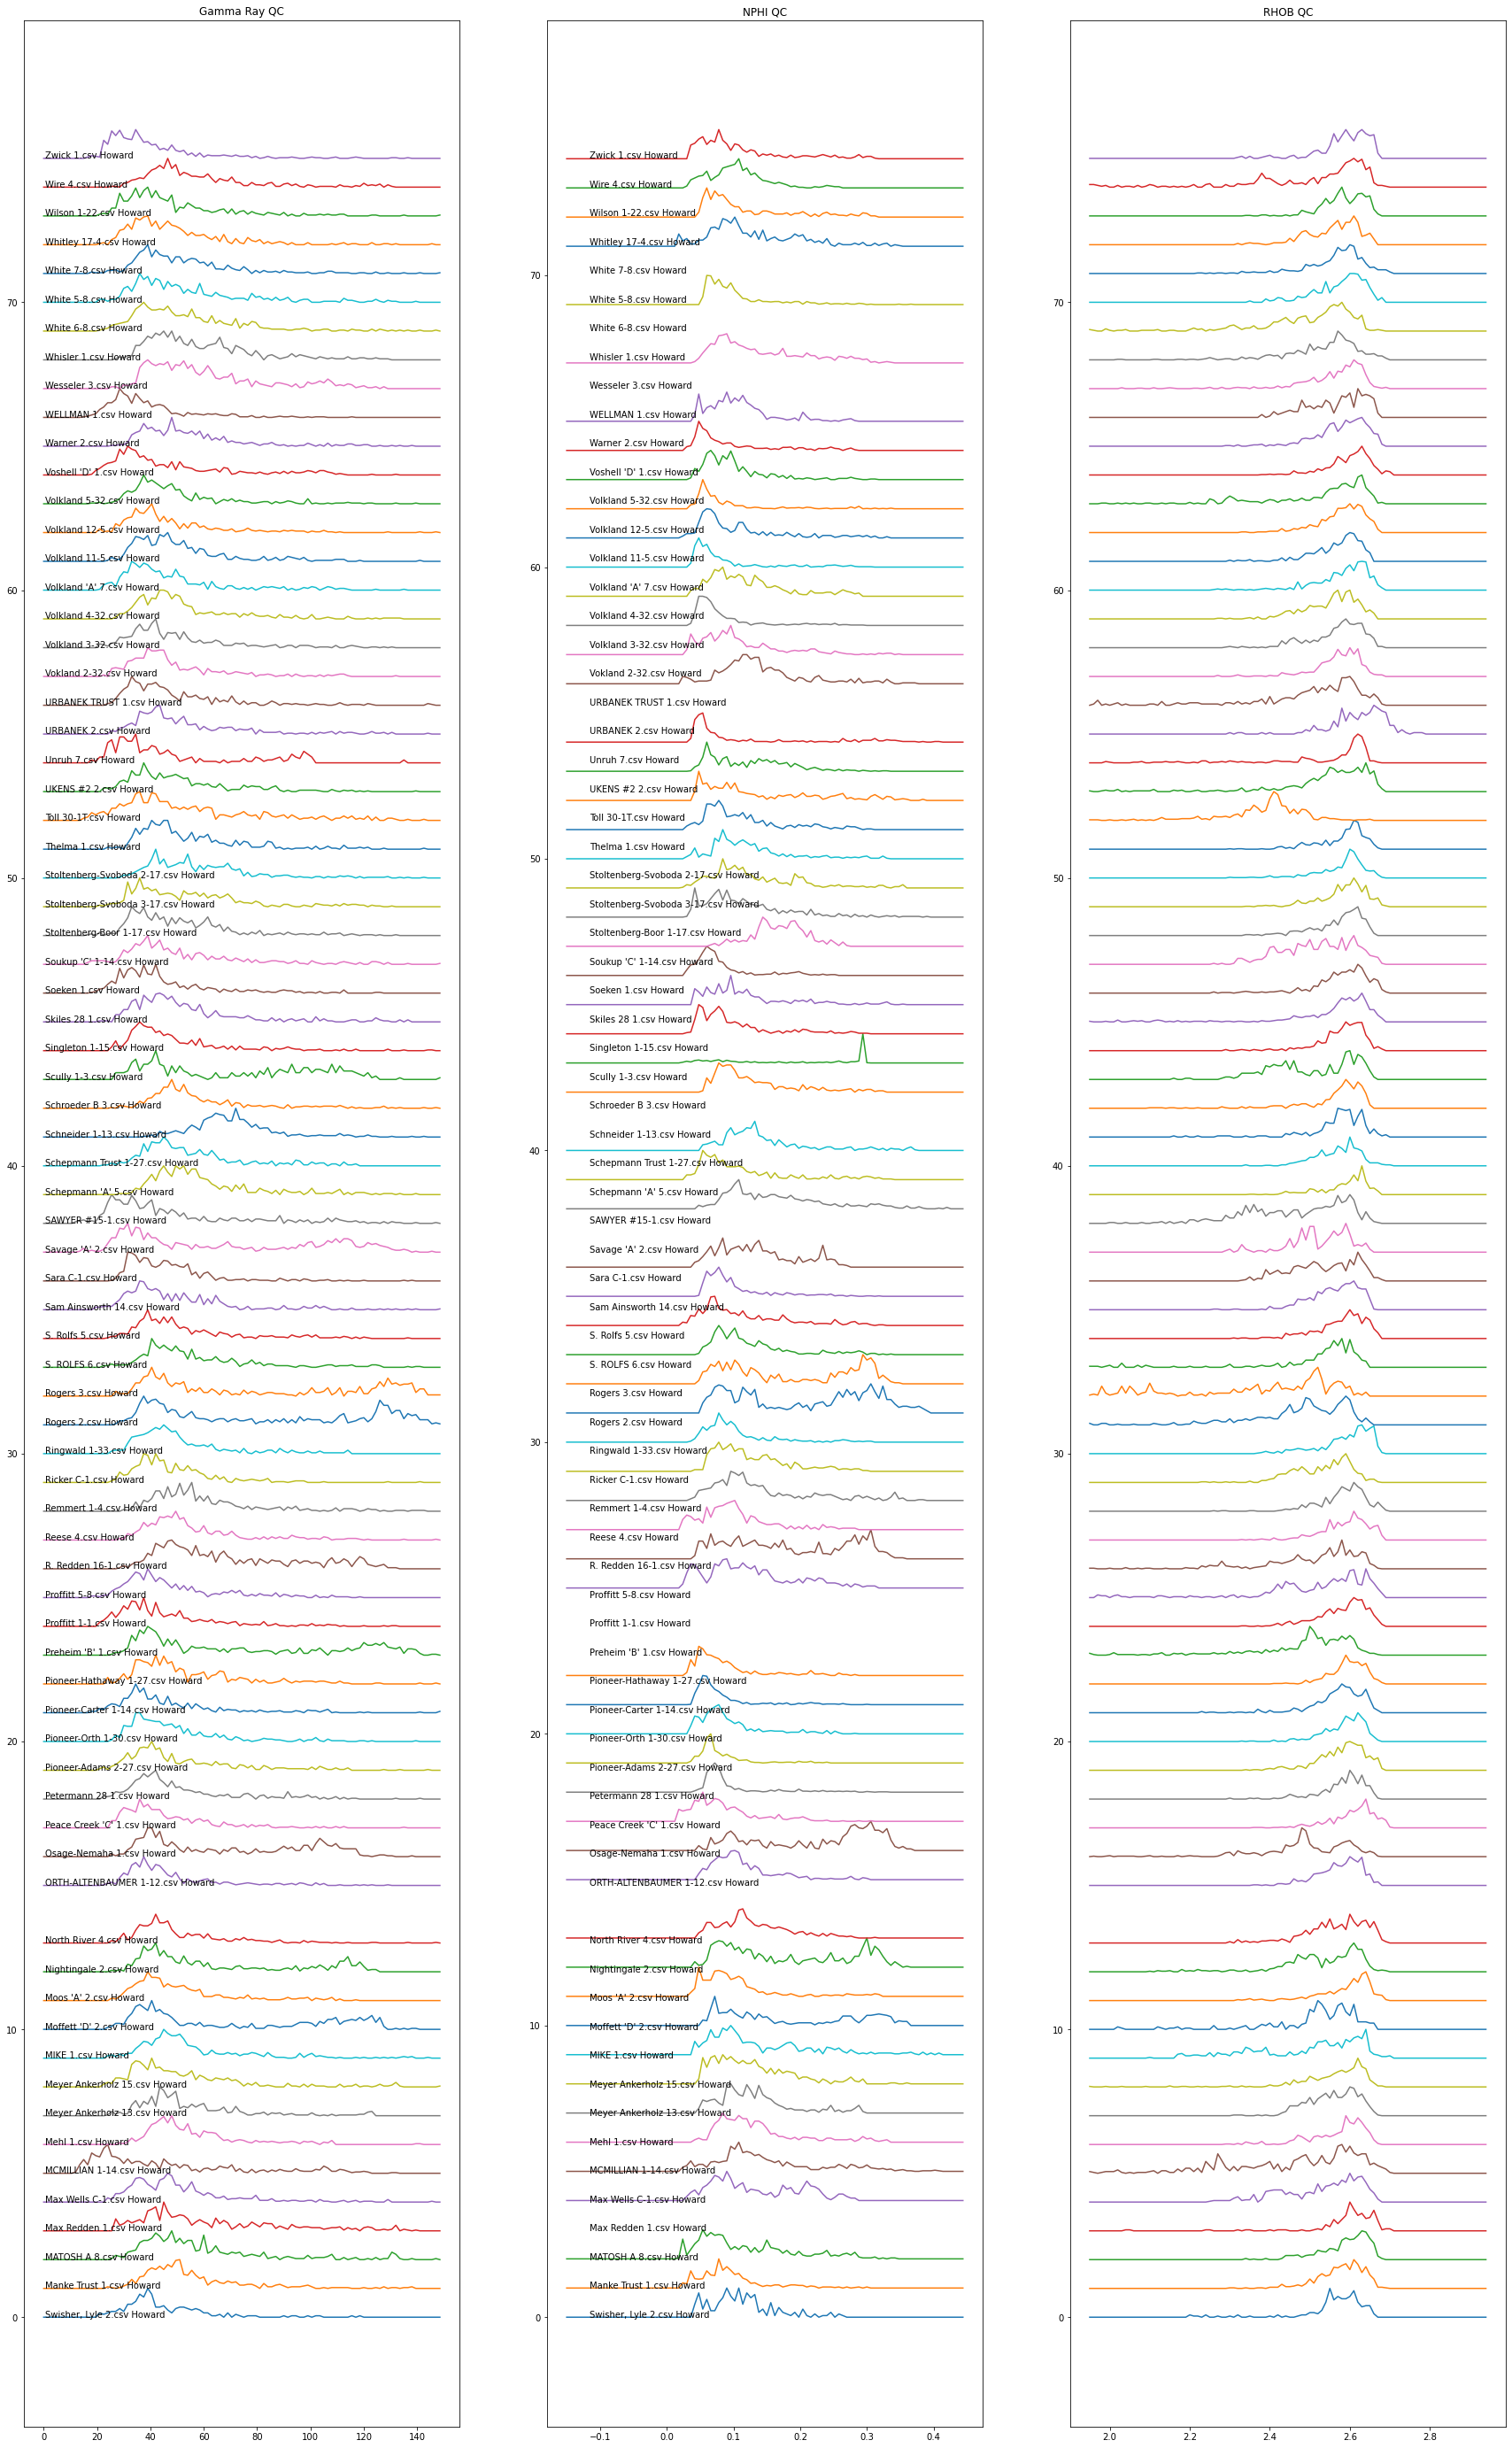

In [17]:
plt.figure(figsize=(30,50))

for num, val in enumerate(Howard.values[100:len(Howard)]):
    try:
        well_name = val[25]
        zone = val[1]
        top = val[6]
        bot = val[7]
        well_data = pd.read_csv('calculated/'+well_name)
        well_data = well_data[(well_data['DEPT'] > top) & (well_data['DEPT'] < bot)]

        # GR
        plt.subplot(1,3,1)
        plt.title("Gamma Ray QC")
        GR = well_data['GR'].values
        gamma_data = np.histogram(GR.flatten(), bins=100, range=(0,150),density=True)
        freq_gamma = gamma_data[0] / max(gamma_data[0])
        bins_gamma = gamma_data[1]
        plt.plot(bins_gamma[:-1], freq_gamma + num)
        plt.text(0.7, num, well_name+' '+zone)
        
        # NPHI 
        plt.subplot(1,3,2)
        plt.title("NPHI QC")
        nphi = well_data['NPHI'].values
        hist_data = np.histogram(nphi.flatten(), bins=100, range=(-0.15,0.45),density=True)
        freq = hist_data[0] / max(hist_data[0])
        bins = hist_data[1]
        plt.plot(bins[:-1], freq + num)
        plt.text(0.7, num, well_name+' '+zone)
        
        #RHOB
        
        plt.subplot(1,3,3)
        plt.title("RHOB QC")
        RHOB = well_data['RHOB'].values
        RHOB_data = np.histogram(RHOB.flatten(), bins=100, range=(1.95,2.95),density=True)
        freq_RHOB = RHOB_data[0] / max(RHOB_data[0])
        bins_RHOB = RHOB_data[1]
        plt.text(0.7, num, well_name+' '+zone)
        plt.plot(bins_RHOB[:-1], freq_RHOB + num)
        
        
        
        
        
       



        
    except:
        pass

In [18]:
lore = glob.glob('kalkulasifilter/*')

In [19]:
df = pd.read_csv(lore[10])

In [20]:
def flipx_ax(index=False):
    plt.gca().invert_yaxis()
    if index == False:
        plt.yticks([],[])
        

In [21]:
marker.head(100)

,Well,ZoneName,Long,Lat,Type,Units,Top,Bottom,Gross,Net,...,AvNWCL,AvRWCL,AvRw,AvTemp,Phi*H,PhiSo*H,Dryclay,Salinity,who,well_data
0,7 C FARMS #1,Heebner,-98.21577,38.596616,MD,ft,2607.00,2722.32,115.32,115.32,...,0.334,2.566,0.063,98.129,7.36,0.09,3.351351,95282.77387,gurning,7 C Farms 1.csv
1,A Goering #1,Heebner,-97.540324,38.335513,MD,ft,2081.14,2326.00,244.86,244.86,...,0.342,2.560,0.069,68.658,23.36,0.12,3.370821,122766.78410,gurning,A. Goering 1.csv
2,Alan No.C-1,Heebner,-98.376504,38.164348,MD,ft,2914.00,3086.52,172.52,172.52,...,0.334,2.581,0.134,102.931,5.27,0.06,3.373874,38425.04008,gurning,Alan C-1.csv
3,Amstutz #1-8,Heebner,-98.344236,38.407085,MD,ft,2748.00,2901.00,153.00,153.00,...,0.294,2.601,0.102,100.416,8.28,0.71,3.267705,53759.20999,gurning,Amstutz 1-8.csv
4,Ankerholz A No.1,Heebner,-98.399422,38.412072,MD,ft,2794.00,2937.00,143.00,143.00,...,0.320,2.585,0.132,101.002,4.67,0.26,3.330882,39836.00114,gurning,Ankerholz 'A' 1.csv
5,APPLETON #5,Heebner,-98.39979,38.399573,MD,ft,2801.00,2952.00,151.00,151.00,...,0.289,2.578,0.104,101.160,7.32,0.51,3.219409,52195.51222,gurning,Appleton 5.csv
6,B.B.Ainsworth #13,Heebner,-98.150026,38.466736,MD,ft,2616.00,2774.00,158.00,158.00,...,0.343,2.558,0.069,98.563,9.24,0.09,3.371385,85518.11392,gurning,B.B. Ainsworth 13.csv
7,Beagley No.1,Heebner,-98.447537,38.680628,MD,ft,2847.00,2965.38,118.38,118.38,...,0.279,2.588,0.091,101.585,4.32,0.08,3.202497,60523.38633,gurning,Beagley 1.csv
8,Behnke No.1-15,Heebner,-98.414161,38.404799,MD,ft,2804.00,2951.00,147.00,147.00,...,0.330,2.572,0.111,101.174,6.11,0.38,3.346269,48453.24580,gurning,Behnke 1-15.csv
9,Berry # 6,Heebner,-96.998456,38.157934,MD,ft,1587.99,1840.50,252.51,252.51,...,0.358,2.581,0.059,84.529,5.90,0.20,3.462617,119201.84210,gurning,Berry 6.csv


In [22]:
marker[marker["Well"].str.contains("Goering ")]

,Well,ZoneName,Long,Lat,Type,Units,Top,Bottom,Gross,Net,...,AvNWCL,AvRWCL,AvRw,AvTemp,Phi*H,PhiSo*H,Dryclay,Salinity,who,well_data
1,A Goering #1,Heebner,-97.540324,38.335513,MD,ft,2081.14,2326.00,244.86,244.86,...,0.342,2.560,0.069,68.658,23.36,0.12,3.370821,122766.78410,gurning,A. Goering 1.csv
37,E. Goering No. 5,Heebner,-97.55381,38.344490,MD,ft,2083.89,2322.00,238.11,238.11,...,0.297,2.597,0.062,91.522,18.83,0.18,3.271693,104041.82540,gurning,E. Goering 5.csv
177,A Goering #1,Howard,-97.540324,38.335513,MD,ft,1777.09,2081.14,304.05,304.05,...,0.240,2.591,0.066,67.580,20.63,0.21,3.093421,131208.42350,gurning,A. Goering 1.csv
213,E. Goering No. 5,Howard,-97.55381,38.344490,MD,ft,1774.51,2083.89,309.38,309.38,...,0.328,2.545,0.105,87.605,13.56,0.06,3.299107,59617.71086,gurning,E. Goering 5.csv


In [23]:

pd.set_option("display.max_columns", 200)   

In [73]:
# lore 37 goereing 1-23 kinda sus

In [423]:
lore[0:128]

['kalkulasifilter\\A. Goering 1.csv',
 'kalkulasifilter\\Alan C-1.csv',
 'kalkulasifilter\\Amstutz 1-8.csv',
 "kalkulasifilter\\Ankerholz 'A' 1.csv",
 'kalkulasifilter\\B.B. Ainsworth 13.csv',
 'kalkulasifilter\\Beagley 1.csv',
 'kalkulasifilter\\Behnke 1-15.csv',
 'kalkulasifilter\\Berry 5.csv',
 'kalkulasifilter\\Berry 6.csv',
 'kalkulasifilter\\Blackhall 5.csv',
 'kalkulasifilter\\BNE 19-22.csv',
 'kalkulasifilter\\BONNEWELL-CARTER UNIT 18-1.csv',
 'kalkulasifilter\\Boye 1-16.csv',
 'kalkulasifilter\\BOYE 1-9.csv',
 'kalkulasifilter\\Brian C-1.csv',
 "kalkulasifilter\\Browning 'C' 1-13.csv",
 'kalkulasifilter\\Buckley 4-18.csv',
 'kalkulasifilter\\Buckley-Doll 1-18.csv',
 'kalkulasifilter\\Burdette 1.csv',
 'kalkulasifilter\\Cemetary C-2.csv',
 'kalkulasifilter\\Comanche 1.csv',
 'kalkulasifilter\\D & S 1-5.csv',
 'kalkulasifilter\\Dale Beneke 1-13.csv',
 'kalkulasifilter\\Dale Beneke 2-13.csv',
 'kalkulasifilter\\DELMAR KAUFMAN 1.csv',
 'kalkulasifilter\\Dewitt 9-33.csv',
 'kalkula

In [474]:
print(lore[137])
df=pd.read_csv(lore[137])


IndexError: list index out of range

In [472]:
mark = marker[marker['well_data'] == "Wire 4.csv"]
mark

,Well,ZoneName,Long,Lat,Type,Units,Top,Bottom,Gross,Net,N/G,AvPhi,AvSw,AvVcl,AvGMAX,AvGMIN,AvNWCL,AvRWCL,AvRw,AvTemp,Phi*H,PhiSo*H,Dryclay,Salinity,who,well_data
174,Wire No.4,Heebner,-98.196619,38.523624,MD,ft,2691.00,2831.0,140.00,140.00,1,0.029,0.941,0.684,130.952,46.971,0.370,2.605,0.077,168.482,4.10,0.24,3.547619,44147.59557,gurning,Wire 4.csv
350,Wire No.4,Howard,-98.196619,38.523624,MD,ft,2417.88,2691.0,273.12,273.12,1,0.079,0.803,0.294,121.009,34.012,0.236,2.649,0.145,160.367,21.48,4.24,3.158377,22541.63763,gurning,Wire 4.csv


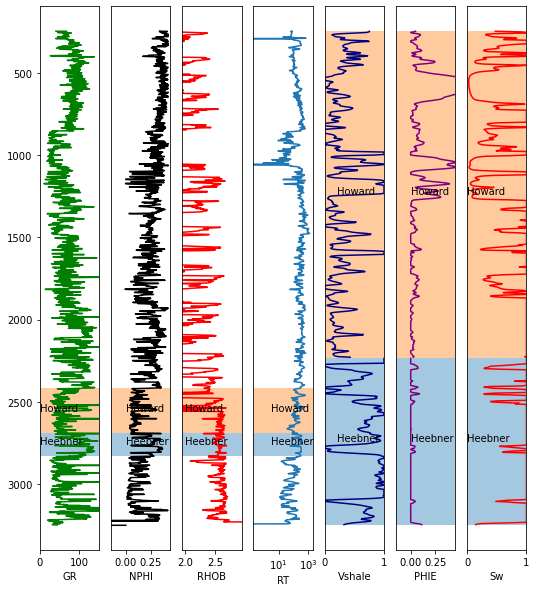

In [473]:
plt.figure(figsize=(10,10))
plt.subplot(1,8,1)
plt.plot('GR', 'DEPT', data= df,color="green")
plt.xlim(0, 150)
plt.xlabel("GR")

for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((0,150),y1=top,y2=bot, alpha=0.4)
    plt.text(0, (bot+top)/2, zone)
flipx_ax(index=True)

# plt.subplot(1,8,2)
# plt.plot('GR', 'DEPT', data= df)
# flipx_ax()


plt.subplot(1,8,2)
plt.plot('NPHI', 'DEPT', data= df,color="black")
plt.xlim(-0.15, 0.45)
plt.xlabel("NPHI")
for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((-0.15, 0.45),y1=top,y2=bot, alpha=0.4)
    plt.text(0, (bot+top)/2, zone)
flipx_ax()


plt.subplot(1,8,3)
plt.plot('RHOB', 'DEPT', data= df,color="red")
plt.xlim(1.95, 2.95)
plt.xlabel("RHOB")
for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((1.95, 2.95),y1=top,y2=bot, alpha=0.4)
    plt.text(2, (bot+top)/2, zone)
flipx_ax()


plt.subplot(1,8,4)
plt.plot('RT', 'DEPT', data= df)
plt.xlim(0.2, 2000)
plt.gca().set_xscale('log')
plt.xlabel("RT")
for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((0.2, 2000),y1=top,y2=bot, alpha=0.4)
    plt.text(3, (bot+top)/2, zone)
flipx_ax()


plt.subplot(1,8,5)
plt.plot('Vshale', 'DEPT', data= df,color="navy")
plt.xlim(0, 1)
plt.xlabel("Vshale")
for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((0, 1),y1=top,y2=bot, alpha=0.4)
    plt.text(0.2, (bot+top)/2, zone)
flipx_ax()


plt.subplot(1,8,6)
plt.plot('PHIE', 'DEPT', data= df,color="purple")
plt.xlim(-0.15, 0.45)
plt.xlabel("PHIE")
for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((-0.15, 0.45),y1=top,y2=bot, alpha=0.4)
    plt.text(0, (bot+top)/2, zone)
flipx_ax()



plt.subplot(1,8,7)
plt.plot('Sw', 'DEPT', data= df,color="red")
plt.xlim(0, 1)
plt.xlabel("Sw")
for val in mark.values:
    zone = val[1]
    top = val[6]
    bot = val[7]
    
    plt.fill_between((0, 1),y1=top,y2=bot, alpha=0.4)
    plt.text(0, (bot+top)/2, zone)
flipx_ax()